In [13]:

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import numpy as np




In [31]:

shapefile_path = 'ShapeFilesFiles/Estados/conjunto_de_datos/00ent.shp'
farmacias_path = 'ShapeFilesFiles/servicios_de_salud_shp/conjunto_de_datos/denue_inegi_62_.shp'
estados_seleccionados = [
    "Chiapas",
    "Oaxaca",
    "Veracruz de Ignacio de la Llave",
    "Tabasco",
    "Campeche"
]

estados = gpd.read_file(shapefile_path)
farmacias = gpd.read_file(farmacias_path)


## Tarea
Va a consistir de 4 pasos basados en lo que aprendimos de como manipular los INEGI shape files.

## Primero
#### Vas a escoger 5 estados y vas a graficar sus vecinos como vimos en el otro archivo. A cada uno de estos grupos los llamaremos grupos de estados.
#### Usa el shapefile de los estados


In [32]:
print(estados.columns)
print(estados["NOMGEO"].unique())

Index(['CVEGEO', 'CVE_ENT', 'NOMGEO', 'geometry'], dtype='object')
['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas']


/var/folders/0f/j23lvhmn0p5gs1_d6mkb42x40000gn/T/ipykernel_79033/3993939016.py:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


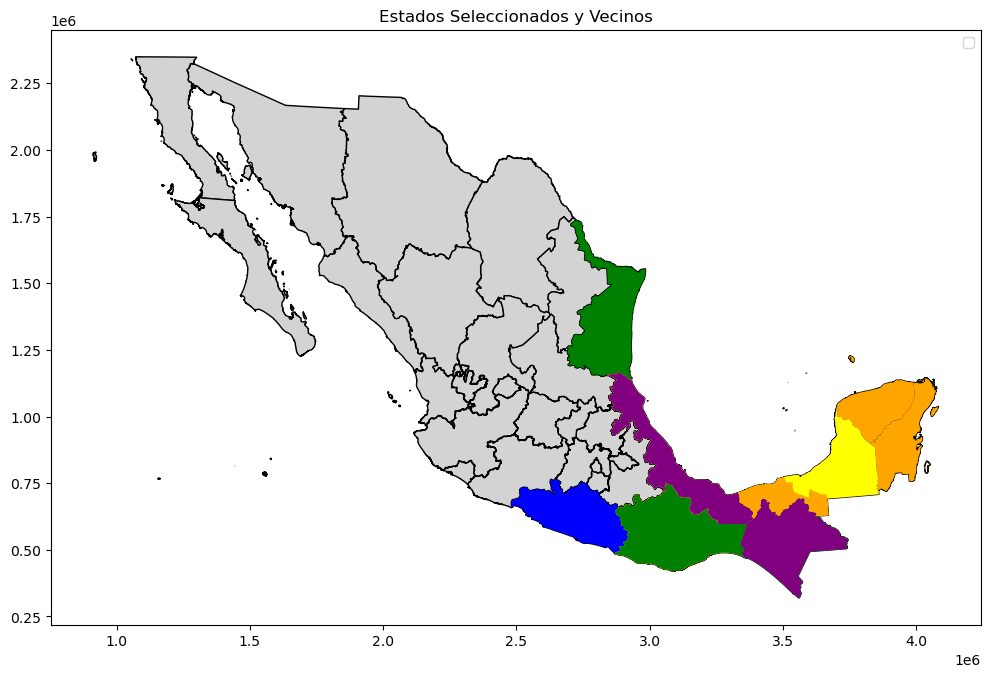

In [33]:
# Filtrar los estados seleccionados
grupos_estados = estados[estados["NOMGEO"].isin(estados_seleccionados)]

def encontrar_vecinos(estado, geodf):
    """
    Encuentra los estados vecinos para un estado dado.
    Parámetros:
        estado (str): Nombre del estado.
        geodf (GeoDataFrame): GeoDataFrame de los estados.
    Retorna:
        GeoDataFrame con los vecinos del estado.
    """
    geometria_estado = geodf[geodf["NOMGEO"] == estado].geometry.iloc[0]
    vecinos = geodf[geodf.geometry.touches(geometria_estado)]
    return vecinos

# Crear un diccionario para almacenar vecinos por estado
vecinos_dict = {}
for estado in estados_seleccionados:
    vecinos_dict[estado] = encontrar_vecinos(estado, estados)

# Graficar los estados seleccionados y sus vecinos
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
estados.plot(ax=ax, color="lightgrey", edgecolor="black")

# Colores para los diferentes grupos
colores = ["red", "blue", "green", "purple", "orange"]

for i, estado in enumerate(estados_seleccionados):
    # Graficar los vecinos del estado
    grupo_vecinos = vecinos_dict[estado]
    grupo_vecinos.plot(ax=ax, color=colores[i], label=f"Vecinos de {estado}")
    
    # Destacar el estado seleccionado
    estados[estados["NOMGEO"] == estado].plot(ax=ax, color="yellow")

# Configurar el gráfico
plt.legend()
plt.title("Estados Seleccionados y Vecinos")
plt.show()

## Segundo
### En cada grupo de estados vas a graficar las farmacias que se encuentran en el área, al igual que un círculo a su alrededor que tenga un radio de igual longitud que la distancia de esa farmacia a la siguiente farmacia más cercana.

In [40]:
farmacias_gdf = farmacias_gdf.to_crs(estados.crs)

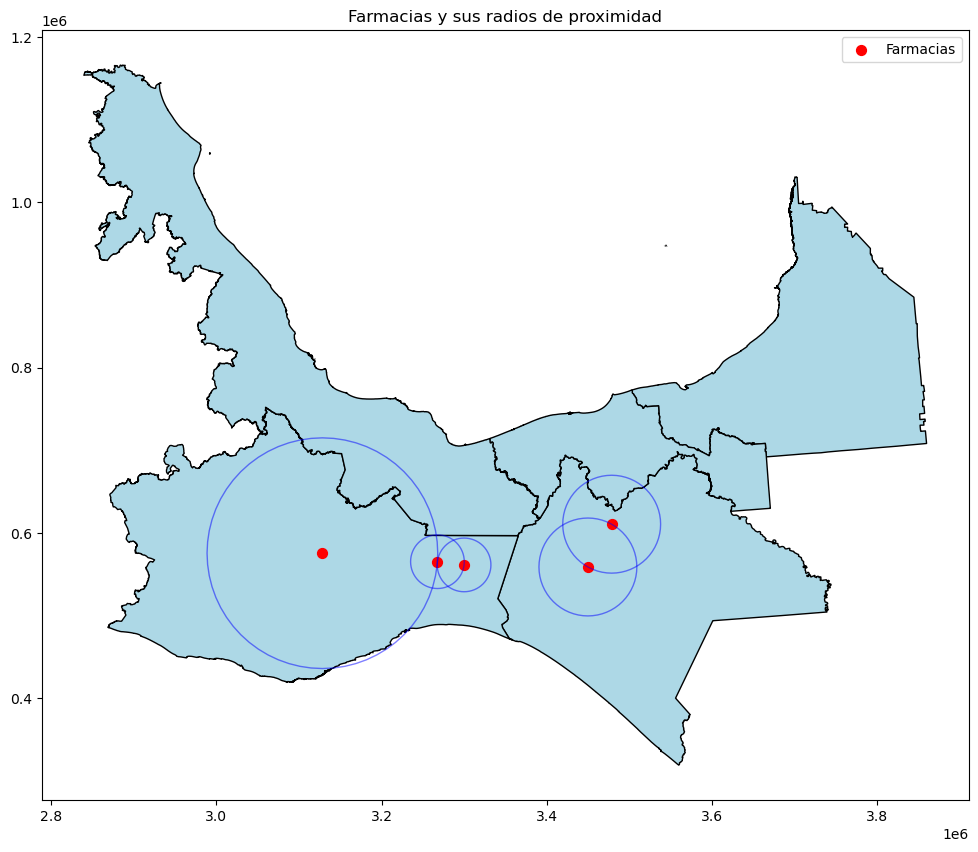

In [43]:
from shapely.geometry import Point
from scipy.spatial import distance_matrix

# Asegurar que las farmacias están en el mismo CRS que los estados
farmacias_gdf = farmacias_gdf.to_crs(estados.crs)

# Graficar farmacias en cada grupo de estados
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
grupos_estados.plot(ax=ax, color="lightblue", edgecolor="black")
farmacias_gdf.plot(ax=ax, color="red", markersize=50, label="Farmacias")

# Calcular distancias entre farmacias y graficar círculos
coords = np.array([[point.x, point.y] for point in farmacias_gdf.geometry])
distances = distance_matrix(coords, coords)

for i, point in enumerate(farmacias_gdf.geometry):
    # Encontrar la distancia mínima a otra farmacia (ignorando la diagonal)
    nearest_distance = np.min(distances[i][distances[i] > 0])
    # Crear un círculo usando el buffer de Shapely
    circle = point.buffer(nearest_distance)
    gpd.GeoSeries([circle]).plot(ax=ax, edgecolor="blue", facecolor="none", alpha=0.5)

# Configuración del gráfico
plt.title("Farmacias y sus radios de proximidad")
plt.legend()
plt.show()

## Tercero
### Por grupo de estados debes calcular cual es la farmacia que en promedio está más alejada de el resto de farmacios.
### Debes graficar las distancias de esta farmacia al resto de las farmacias en el grupo de estados.

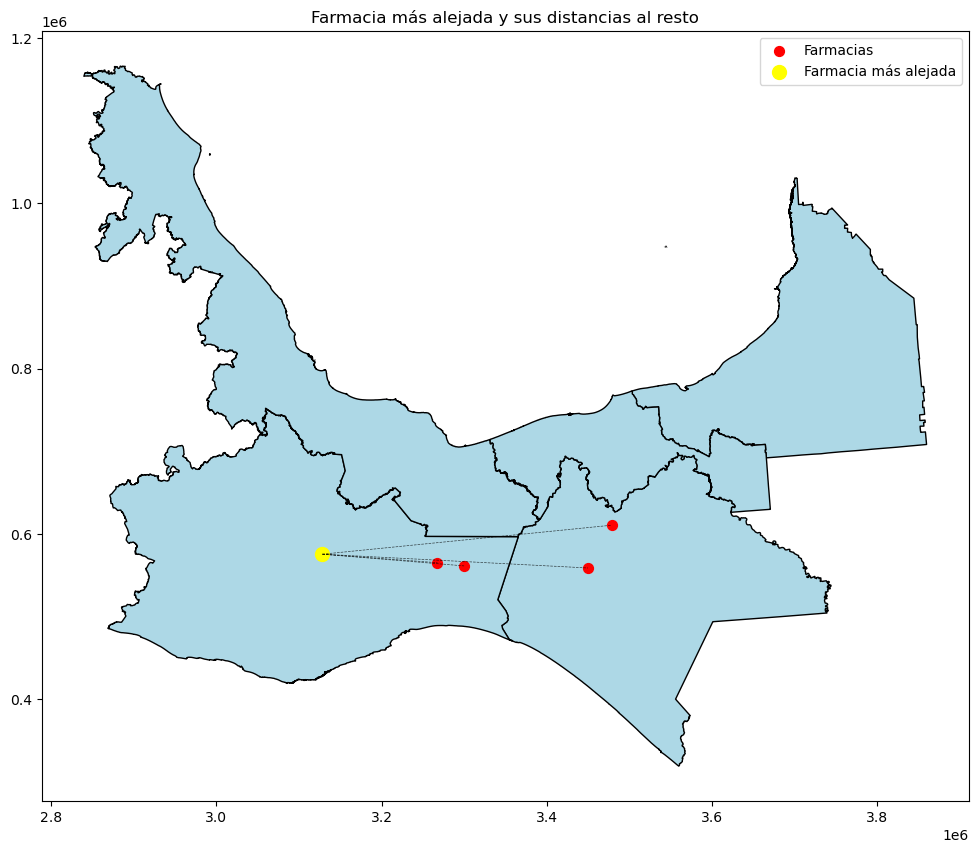

Farmacia más alejada:
nombre                                                   Farmacia2
lat                                                          17.05
lon                                                          -96.1
geometry              POINT (3128448.9898174633 575583.2714430783)
distancia_promedio                                   197022.101096
Name: 1, dtype: object


In [44]:
farmacias_data = {
    "nombre": ["Farmacia1", "Farmacia2", "Farmacia3", "Farmacia4", "Farmacia5"],
    "lat": [16.75, 17.05, 16.85, 17.20, 16.90],
    "lon": [-93.1, -96.1, -94.5, -92.8, -94.8]
}
farmacias_df = pd.DataFrame(farmacias_data)
farmacias_gdf = gpd.GeoDataFrame(
    farmacias_df,
    geometry=gpd.points_from_xy(farmacias_df["lon"], farmacias_df["lat"]),
    crs="EPSG:4326"
)

# Asegurar que las farmacias estén en el mismo CRS que los estados
farmacias_gdf = farmacias_gdf.to_crs(estados.crs)

# Calcular la matriz de distancias entre las farmacias
coords = np.array([[point.x, point.y] for point in farmacias_gdf.geometry])
distances = distance_matrix(coords, coords)

# Calcular las distancias promedio para cada farmacia
dist_avg = distances.mean(axis=1)
farmacias_gdf["distancia_promedio"] = dist_avg

# Identificar la farmacia más alejada en promedio
indice_mas_alejada = np.argmax(dist_avg)
farmacia_mas_alejada = farmacias_gdf.iloc[indice_mas_alejada]

# Graficar las distancias de la farmacia más alejada al resto
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
grupos_estados.plot(ax=ax, color="lightblue", edgecolor="black")
farmacias_gdf.plot(ax=ax, color="red", markersize=50, label="Farmacias")
farmacias_gdf[farmacias_gdf.index == indice_mas_alejada].plot(
    ax=ax, color="yellow", markersize=100, label="Farmacia más alejada"
)

# Graficar las líneas de conexión a otras farmacias
for i, point in farmacias_gdf.iterrows():
    plt.plot(
        [farmacia_mas_alejada.geometry.x, point.geometry.x],
        [farmacia_mas_alejada.geometry.y, point.geometry.y],
        color="black",
        linestyle="--",
        linewidth=0.5,
        alpha=0.7
    )

# Configurar el gráfico
plt.title("Farmacia más alejada y sus distancias al resto")
plt.legend()
plt.show()

# Imprimir detalles de la farmacia más alejada
print("Farmacia más alejada:")
print(farmacia_mas_alejada)

## Cuarto
### Calcula cual es el grupo de estados con mayor distancia promedio entre sus farmacias.
### Luego grafica el país completo con el shapefile de estados y grafica el grupo de estados con mayor distancia promedio entre farmacias de un color distinto.

Grupo con mayor distancia promedio: Chiapas


/var/folders/0f/j23lvhmn0p5gs1_d6mkb42x40000gn/T/ipykernel_79033/739828778.py:46: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


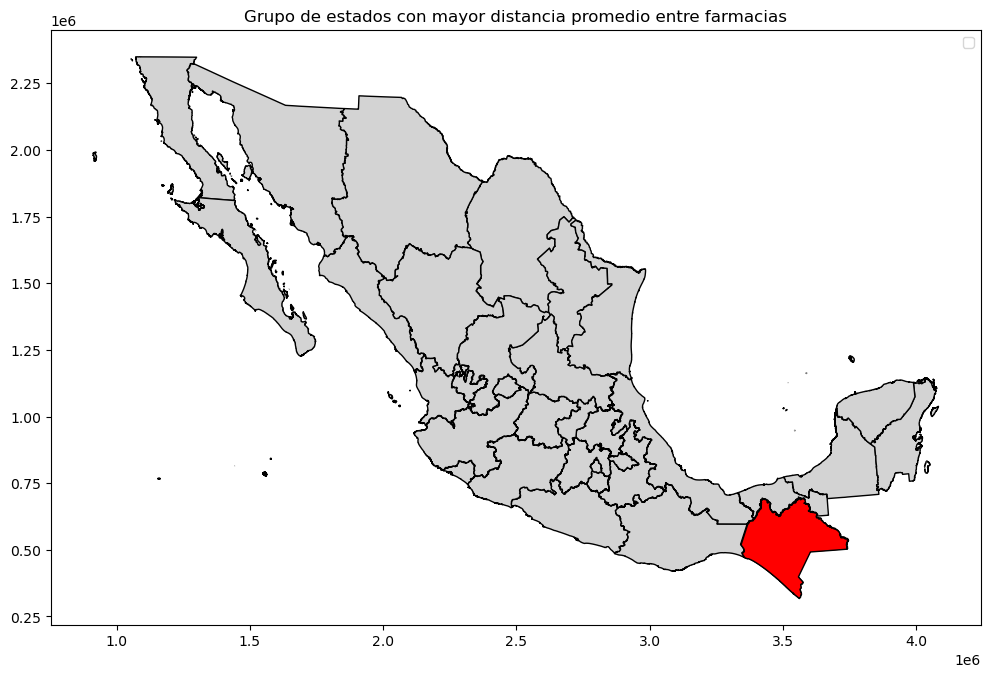

In [45]:
# Crear un GeoDataFrame ficticio para las farmacias
farmacias_data = {
    "nombre": ["Farmacia1", "Farmacia2", "Farmacia3", "Farmacia4", "Farmacia5"],
    "lat": [16.75, 17.05, 16.85, 17.20, 16.90],
    "lon": [-93.1, -96.1, -94.5, -92.8, -94.8]
}
farmacias_df = pd.DataFrame(farmacias_data)
farmacias_gdf = gpd.GeoDataFrame(
    farmacias_df,
    geometry=gpd.points_from_xy(farmacias_df["lon"], farmacias_df["lat"]),
    crs="EPSG:4326"
)

# Asegurar que las farmacias estén en el mismo CRS que los estados
farmacias_gdf = farmacias_gdf.to_crs(estados.crs)

# Calcular la matriz de distancias entre farmacias
coords = np.array([[point.x, point.y] for point in farmacias_gdf.geometry])
distances = distance_matrix(coords, coords)

# Calcular distancia promedio entre farmacias
dist_avg = distances.mean(axis=1)
farmacias_gdf["distancia_promedio"] = dist_avg

# Determinar el grupo con la mayor distancia promedio entre farmacias
grupo_distancias = {
    estado: distances.mean()
    for estado in estados_seleccionados
}

grupo_mas_distante = max(grupo_distancias, key=grupo_distancias.get)
print(f"Grupo con mayor distancia promedio: {grupo_mas_distante}")

# Graficar el país y destacar el grupo
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Graficar todos los estados
estados.plot(ax=ax, color="lightgrey", edgecolor="black")

# Destacar el grupo con mayor distancia promedio
grupo_destacado = estados[estados["NOMGEO"] == grupo_mas_distante]
grupo_destacado.plot(ax=ax, color="red", edgecolor="black", label="Grupo destacado")

# Configurar el gráfico
plt.title("Grupo de estados con mayor distancia promedio entre farmacias")
plt.legend()
plt.show()